# WEEK 14 (29/01/18)

### Done


### To Do
* RUN EVERYTHING ON SMALLER SYSTEM TO MAKE SURE THERE'S NOTHING WRONG WITH THE CODE
* Analyse the mass dependency of $\epsilon$ from the plots
* Start clustering cities together to see if flow is different at intra-city and inter-city level

### Questions
* <font color='RED'> Why is epsilon negative?</font> 

## 1 Analysis on small system

Let's create a very small population with m = 1 to find exactly why epsilon goes negative.

In [1]:
%load_ext autoreload
%autoreload 2

In [45]:
from hm.pop_models import pop_random, population
from hm.analysis.scaling.pop_hierarchy import pop_hier
from hm.analysis.scaling.plots import eps_distance
import hm.analysis.scaling.eps_scale
from matplotlib import pyplot as plt
import pandas
import seaborn as sns; sns.set()

In [71]:
pop = pop_random.random(2000)

In [105]:
h = pop_hier(pop, [0.001, 0.002, 0.003, 0.004])

In [97]:
gamma = 1.03

In [106]:
eps_1 = h.epsilon(1, gamma=gamma)
eps_2 = h.epsilon(2, gamma=gamma)
eps_3 = h.epsilon(3, gamma=gamma)
eps_4 = h.epsilon(4, gamma=gamma)
eps_5 = h.epsilon(5, gamma=gamma)

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget


Object has only been initialised with 4 levels


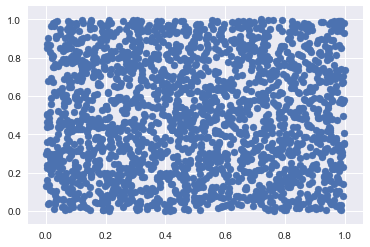

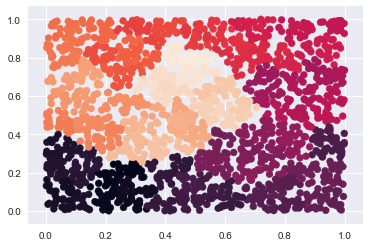

In [100]:
plt.scatter(pop.locCoords.T[0], pop.locCoords.T[1])
plt.show()
level_1 = h.levels[0]
level_1.viz_clusters()

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Ilaria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Ilaria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Ilaria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/Ilaria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


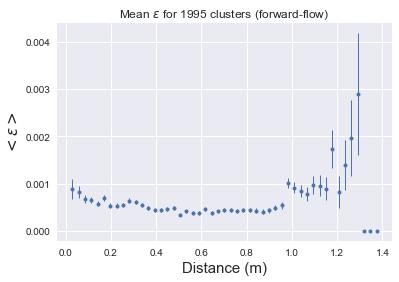

In [107]:
N = 50
DM = h.DM_level(1)
eps_distance(eps_1, DM, N)

In [108]:
eps_1_r = h.epsilon(1, gamma=gamma, model = 'r')
eps_2_r = h.epsilon(2, gamma=gamma, model = 'r')
eps_3_r = h.epsilon(3, gamma=gamma, model = 'r')
eps_4_r = h.epsilon(4, gamma=gamma, model = 'r')
eps_5_r = h.epsilon(5, gamma=gamma, model = 'r')

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget


Object has only been initialised with 4 levels


/Users/Ilaria/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Ilaria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Ilaria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Ilaria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/Ilaria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


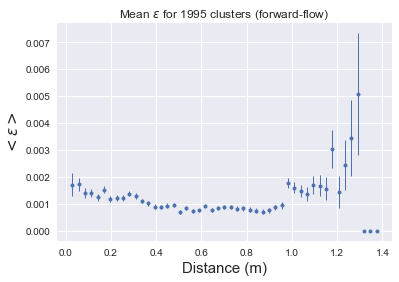

In [109]:
N = 50
DM = h.DM_level(1)
eps_distance(eps_1_r, DM, N)

** we found out why it goes negative!!!**
Since we changed gamma to be computed at each level based on the area of the region involved, the parameter would increase as we go up in levels, therefore the flow would get smaller and smaller ---> hence the negative values!

So we have an idea: what if, given the initial location distribution (level 0) we can work out how gamma scales at the different levels by keeping the error constant (say epsilon = 0) and then come up with an equation that related gamma only to, say the area. This would make the gravity model PARAMETER FREE! Given any population distribution, one could then find gamma and fit the model to the data.

$$ \gamma = 0.3 <S> $$